# Running Models based on tuned hyperparameters

Tuned hyperparameters can be referenced from the hyperparameter_tuning_xgboost_randomforest.ipynb

In [1]:
##Importing all the required libraries

import pandas as pd
import numpy as np
from scipy.io import arff
import os
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import scipy
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
import xgboost as xgb
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###Importing all the 4 datasets into respective pandas dataframe
###Cleaning the columns of each dataframe
###Combining 18 class labels into 3 class labels

phone_accel_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/phone/accel')
filenames.pop(0) ## to remove the ".DS_Store" file from the list
for file in filenames:
    path = "wisdm-dataset/arff_files/phone/accel/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, phone_accel_df]
    phone_accel_df = pd.concat(frames, sort = False)
    
print(phone_accel_df.shape)
    
phone_accel_old_column_names = phone_accel_df.columns

### Cleaning the column names of the dataframe

phone_accel_new_column_names = []
for name in phone_accel_old_column_names:
    phone_accel_new_column_names.append(name.replace('"', ''))
    
### Replacing old column names with the cleaned column names

replacement_dict = dict(zip(phone_accel_old_column_names, phone_accel_new_column_names))
phone_accel_df = phone_accel_df.rename(columns = replacement_dict)

phone_accel_df['ACTIVITY'] = phone_accel_df['ACTIVITY'].replace(to_replace = [b'A', b'B', b'C', b'D', b'E', b'M'], value = 0)
phone_accel_df['ACTIVITY'] = phone_accel_df['ACTIVITY'].replace(to_replace = [b'F', b'G', b'O', b'P', b'Q', b'R', b'S'], value = 1)
phone_accel_df['ACTIVITY'] = phone_accel_df['ACTIVITY'].replace(to_replace = [b'H', b'I', b'J', b'K', b'L'], value = 2)

phone_accel_df.pop('class')

phone_accel_df_shuffle = shuffle(phone_accel_df)

phone_accel_data = phone_accel_df_shuffle.to_numpy()

X_phone_accel = phone_accel_data[:,1:]
Y_phone_accel = phone_accel_data[:,0]
print(X_phone_accel.shape)
print(Y_phone_accel.shape)

x_train_phone_accel, x_test_phone_accel, y_train_phone_accel, y_test_phone_accel = train_test_split(X_phone_accel, Y_phone_accel, test_size = 0.2)

##############################################################################

phone_gyro_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/phone/gyro')
filenames.pop(0) ## to remove the ".DS_Store" file from the list
for file in filenames:
    path = "wisdm-dataset/arff_files/phone/gyro/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, phone_gyro_df]
    phone_gyro_df = pd.concat(frames, sort = False)
    
print(phone_gyro_df.shape)
    
phone_gyro_old_column_names = phone_gyro_df.columns

### Cleaning the column names of the dataframe

phone_gyro_new_column_names = []
for name in phone_gyro_old_column_names:
    phone_gyro_new_column_names.append(name.replace('"', ''))
    
### Replacing old column names with the cleaned column names

replacement_dict = dict(zip(phone_gyro_old_column_names, phone_gyro_new_column_names))
phone_gyro_df = phone_gyro_df.rename(columns = replacement_dict)

phone_gyro_df['ACTIVITY'] = phone_gyro_df['ACTIVITY'].replace(to_replace = [b'A', b'B', b'C', b'D', b'E', b'M'], value = 0)
phone_gyro_df['ACTIVITY'] = phone_gyro_df['ACTIVITY'].replace(to_replace = [b'F', b'G', b'O', b'P', b'Q', b'R', b'S'], value = 1)
phone_gyro_df['ACTIVITY'] = phone_gyro_df['ACTIVITY'].replace(to_replace = [b'H', b'I', b'J', b'K', b'L'], value = 2)

phone_gyro_df.pop('class')

phone_gyro_df_shuffle = shuffle(phone_gyro_df)

phone_gyro_data = phone_gyro_df_shuffle.to_numpy()

X_phone_gyro = phone_gyro_data[:,1:]
Y_phone_gyro = phone_gyro_data[:,0]
print(X_phone_gyro.shape)
print(Y_phone_gyro.shape)

x_train_phone_gyro, x_test_phone_gyro, y_train_phone_gyro, y_test_phone_gyro = train_test_split(X_phone_gyro, Y_phone_gyro, test_size = 0.2)


###################################################################################################


watch_accel_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/watch/accel')
filenames.pop(0) ## to remove the ".DS_Store" file from the list
for file in filenames:
    path = "wisdm-dataset/arff_files/watch/accel/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, watch_accel_df]
    watch_accel_df = pd.concat(frames, sort = False)
    
print(watch_accel_df.shape)
    
watch_accel_old_column_names = watch_accel_df.columns

### Cleaning the column names of the dataframe

watch_accel_new_column_names = []
for name in watch_accel_old_column_names:
    watch_accel_new_column_names.append(name.replace('"', ''))
    
### Replacing old column names with the cleaned column names

replacement_dict = dict(zip(watch_accel_old_column_names, watch_accel_new_column_names))
watch_accel_df = watch_accel_df.rename(columns = replacement_dict)

watch_accel_df['ACTIVITY'] = watch_accel_df['ACTIVITY'].replace(to_replace = [b'A', b'B', b'C', b'D', b'E', b'M'], value = 0)
watch_accel_df['ACTIVITY'] = watch_accel_df['ACTIVITY'].replace(to_replace = [b'F', b'G', b'O', b'P', b'Q', b'R', b'S'], value = 1)
watch_accel_df['ACTIVITY'] = watch_accel_df['ACTIVITY'].replace(to_replace = [b'H', b'I', b'J', b'K', b'L'], value = 2)

watch_accel_df.pop('class')

watch_accel_df_shuffle = shuffle(watch_accel_df)

watch_accel_data = watch_accel_df_shuffle.to_numpy()

X_watch_accel = watch_accel_data[:,1:]
Y_watch_accel = watch_accel_data[:,0]
print(X_watch_accel.shape)
print(Y_watch_accel.shape)

x_train_watch_accel, x_test_watch_accel, y_train_watch_accel, y_test_watch_accel = train_test_split(X_watch_accel, Y_watch_accel, test_size = 0.2)


#############################################################################################


watch_gyro_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/watch/gyro')
filenames.pop(0) ## to remove the ".DS_Store" file from the list
for file in filenames:
    path = "wisdm-dataset/arff_files/watch/gyro/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, watch_gyro_df]
    watch_gyro_df = pd.concat(frames, sort = False)
    
print(watch_gyro_df.shape)
    
watch_gyro_old_column_names = watch_gyro_df.columns

### Cleaning the column names of the dataframe

watch_gyro_new_column_names = []
for name in watch_gyro_old_column_names:
    watch_gyro_new_column_names.append(name.replace('"', ''))

### Replacing old column names with the cleaned column names

replacement_dict = dict(zip(watch_gyro_old_column_names, watch_gyro_new_column_names))
watch_gyro_df = watch_gyro_df.rename(columns = replacement_dict)

watch_gyro_df['ACTIVITY'] = watch_gyro_df['ACTIVITY'].replace(to_replace = [b'A', b'B', b'C', b'D', b'E', b'M'], value = 0)
watch_gyro_df['ACTIVITY'] = watch_gyro_df['ACTIVITY'].replace(to_replace = [b'F', b'G', b'O', b'P', b'Q', b'R', b'S'], value = 1)
watch_gyro_df['ACTIVITY'] = watch_gyro_df['ACTIVITY'].replace(to_replace = [b'H', b'I', b'J', b'K', b'L'], value = 2)

watch_gyro_df.pop('class')

watch_gyro_df_shuffle = shuffle(watch_gyro_df)

watch_gyro_data = watch_gyro_df_shuffle.to_numpy()

X_watch_gyro = watch_gyro_data[:,1:]
Y_watch_gyro = watch_gyro_data[:,0]
print(X_watch_gyro.shape)
print(Y_watch_gyro.shape)

x_train_watch_gyro, x_test_watch_gyro, y_train_watch_gyro, y_test_watch_gyro = train_test_split(X_watch_gyro, Y_watch_gyro, test_size = 0.2)


for file at wisdm-dataset/arff_files/phone/accel/data_1600_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1601_accel_phone.arffshape is: (407, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1602_accel_phone.arffshape is: (424, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1603_accel_phone.arffshape is: (409, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1604_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1605_accel_phone.arffshape is: (406, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1606_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1607_accel_phone.arffshape is: (383, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1608_accel_phone.arffshape is: (482, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1609_accel_phone.arffshape is: (306, 93)
for file at wisdm-dataset/arff_files/phone/accel/d

for file at wisdm-dataset/arff_files/phone/gyro/data_1639_gyro_phone.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1640_gyro_phone.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1641_gyro_phone.arffshape is: (379, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1642_gyro_phone.arffshape is: (357, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1643_gyro_phone.arffshape is: (379, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1644_gyro_phone.arffshape is: (379, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1645_gyro_phone.arffshape is: (401, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1646_gyro_phone.arffshape is: (401, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1647_gyro_phone.arffshape is: (405, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1648_gyro_phone.arffshape is: (401, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1649_gyro_phone.a

for file at wisdm-dataset/arff_files/watch/gyro/data_1629_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1630_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1631_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1632_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1633_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1634_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1635_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1636_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1637_gyro_watch.arffshape is: (357, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1638_gyro_watch.arffshape is: (357, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1639_gyro_watch.a

In [3]:
phone_accel_df['ACTIVITY'].unique()

array([0, 1, 2], dtype=int64)

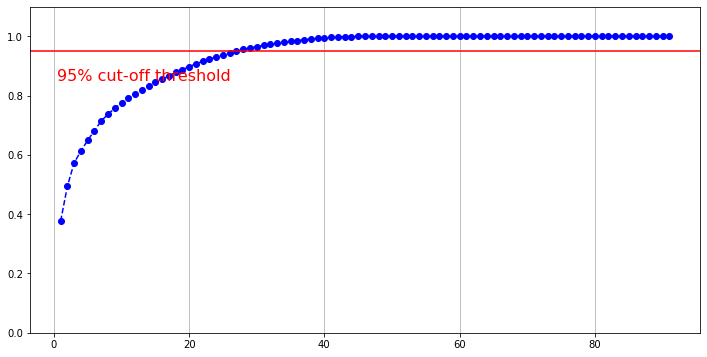

In [4]:
###Performing PCA and seeing the plot of explained variance v/s the number of components

x_train_phone_accel_pca = StandardScaler().fit_transform(x_train_phone_accel) # normalizing the features
pca = PCA().fit(x_train_phone_accel_pca)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 92, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()


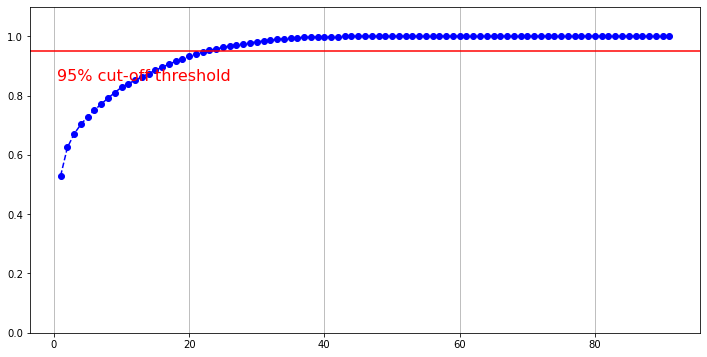

In [5]:
###Performing PCA and seeing the plot of explained variance v/s the number of components

x_train_phone_gyro_pca = StandardScaler().fit_transform(x_train_phone_gyro) # normalizing the features
pca = PCA().fit(x_train_phone_gyro_pca)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 92, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()


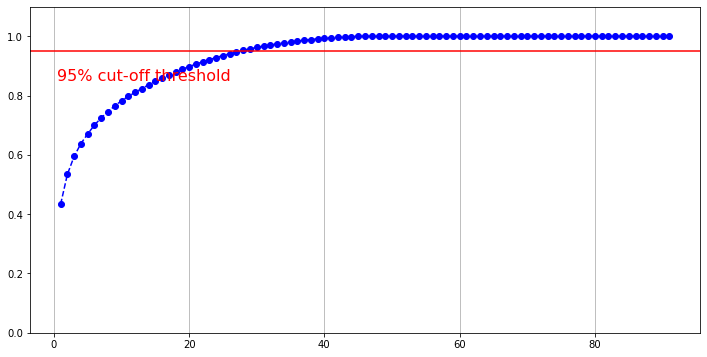

In [6]:
###Performing PCA and seeing the plot of explained variance v/s the number of components

x_train_watch_accel_pca = StandardScaler().fit_transform(x_train_watch_accel) # normalizing the features
pca = PCA().fit(x_train_watch_accel_pca)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 92, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()


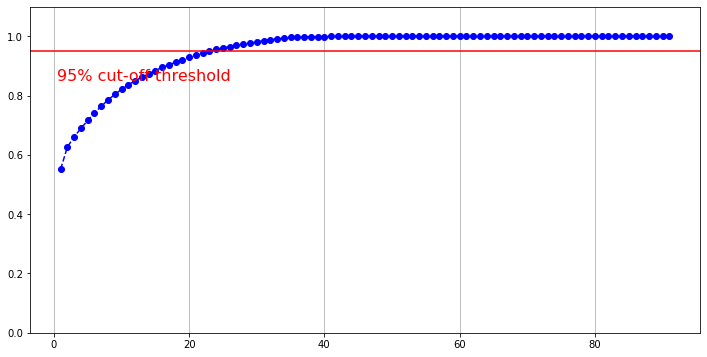

In [7]:
###Performing PCA and seeing the plot of explained variance v/s the number of components

x_train_watch_gyro_pca = StandardScaler().fit_transform(x_train_watch_gyro) # normalizing the features
pca = PCA().fit(x_train_watch_gyro_pca)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 92, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()


In [8]:
## The number of components chosen from the explained varance graph are used to perform pca on the dataset

pca1 = PCA(n_components = 28)
pca1.fit(x_train_watch_accel)

x_train_watch_accel_pca = pca1.transform(x_train_watch_accel)
x_test_watch_accel_pca = pca1.transform(x_test_watch_accel)



pca2 = PCA(n_components = 28)
pca2.fit(x_train_phone_accel)

x_train_phone_accel_pca = pca2.transform(x_train_phone_accel)
x_test_phone_accel_pca = pca2.transform(x_test_phone_accel)



pca3 = PCA(n_components = 23)
pca3.fit(x_train_watch_gyro)

x_train_watch_gyro_pca = pca3.transform(x_train_watch_gyro)
x_test_watch_gyro_pca = pca3.transform(x_test_watch_gyro)



pca4 = PCA(n_components = 23)
pca4.fit(x_train_phone_gyro)

x_train_phone_gyro_pca = pca4.transform(x_train_phone_gyro)
x_test_phone_gyro_pca = pca4.transform(x_test_phone_gyro)

In [3]:
##Function to print metrics

def print_metrics(y_test, y_test_pred):
    print("Precision:")
    print("average = Nonen: ", precision_score(y_test, y_test_pred, average = None))
    print("average = micro: ", precision_score(y_test, y_test_pred, average = 'micro'))
    print("average = macro: ", precision_score(y_test, y_test_pred, average = 'macro'))
    print("average = weighted: ", precision_score(y_test, y_test_pred, average = 'weighted'))
    
    print("Recall:")
    print("average = Nonen: ", recall_score(y_test, y_test_pred, average = None))
    print("average = micro: ", recall_score(y_test, y_test_pred, average = 'micro'))
    print("average = macro: ", recall_score(y_test, y_test_pred, average = 'macro'))
    print("average = weighted: ", recall_score(y_test, y_test_pred, average = 'weighted'))
    
    print("F1 Score:")
    print("average = Nonen: ", f1_score(y_test, y_test_pred, average = None))
    print("average = micro: ", f1_score(y_test, y_test_pred, average = 'micro'))
    print("average = macro: ", f1_score(y_test, y_test_pred, average = 'macro'))
    print("average = weighted: ", f1_score(y_test, y_test_pred, average = 'weighted'))

# Random Forest

Running 8 Random Forest models. 2 models for eahc of the 4 datasets (with and without pca)

In [68]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_split = 4, n_estimators = 450, n_jobs = -1)

clf.fit(x_train_phone_accel, y_train_phone_accel)

y_train_pred = clf.predict(x_train_phone_accel)
y_test_pred = clf.predict(x_test_phone_accel)


train_acc = accuracy_score(y_train_phone_accel, y_train_pred)
test_acc = accuracy_score(y_test_phone_accel, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_phone_accel, y_test_pred)

Train accuracy:  0.9905195297686765
Test accuracy:  0.9250270855904659
Precision:
average = Nonen:  [0.94252874 0.9194847  0.9128044 ]
average = micro:  0.9250270855904659
average = macro:  0.9249392789276422
average = weighted:  0.9252546121793253
Recall:
average = Nonen:  [0.92013201 0.92096774 0.93709677]
average = micro:  0.9250270855904659
average = macro:  0.9260655097767841
average = weighted:  0.9250270855904659
F1 Score:
average = Nonen:  [0.93119572 0.92022562 0.92479109]
average = micro:  0.9250270855904659
average = macro:  0.9254041452100825
average = weighted:  0.9250535496607923


In [69]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_split = 4, n_estimators = 450, n_jobs = -1)

clf.fit(x_train_phone_gyro, y_train_phone_gyro)

y_train_pred = clf.predict(x_train_phone_gyro)
y_test_pred = clf.predict(x_test_phone_gyro)


train_acc = accuracy_score(y_train_phone_gyro, y_train_pred)
test_acc = accuracy_score(y_test_phone_gyro, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_phone_gyro, y_test_pred)

Train accuracy:  0.9476273148148148
Test accuracy:  0.7324269597917269
Precision:
average = Nonen:  [0.86192893 0.70977011 0.64351852]
average = micro:  0.7324269597917269
average = macro:  0.7384058558237331
average = weighted:  0.7440641351942474
Recall:
average = Nonen:  [0.71464646 0.74285714 0.74014909]
average = micro:  0.7324269597917269
average = macro:  0.7325509007617633
average = weighted:  0.7324269597917269
F1 Score:
average = Nonen:  [0.78140819 0.72593681 0.68845963]
average = micro:  0.732426959791727
average = macro:  0.7319348786968618
average = weighted:  0.7348199265619062


In [70]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_split = 4, n_estimators = 450, n_jobs = -1)

clf.fit(x_train_watch_accel, y_train_watch_accel)

y_train_pred = clf.predict(x_train_watch_accel)
y_test_pred = clf.predict(x_test_watch_accel)


train_acc = accuracy_score(y_train_watch_accel, y_train_pred)
test_acc = accuracy_score(y_test_watch_accel, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_watch_accel, y_test_pred)

Train accuracy:  0.9980779791323449
Test accuracy:  0.934120230579193
Precision:
average = Nonen:  [0.95238095 0.92434211 0.92871287]
average = micro:  0.934120230579193
average = macro:  0.9351453096437462
average = weighted:  0.9346054129440897
Recall:
average = Nonen:  [0.89906701 0.95383571 0.94651867]
average = micro:  0.934120230579193
average = macro:  0.9331404611286227
average = weighted:  0.934120230579193
F1 Score:
average = Nonen:  [0.92495637 0.93885733 0.93753123]
average = micro:  0.934120230579193
average = macro:  0.9337816460480579
average = weighted:  0.9339977672629661


In [71]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_split = 4, n_estimators = 450, n_jobs = -1)

clf.fit(x_train_watch_gyro, y_train_watch_gyro)

y_train_pred = clf.predict(x_train_watch_gyro)
y_test_pred = clf.predict(x_test_watch_gyro)


train_acc = accuracy_score(y_train_watch_gyro, y_train_pred)
test_acc = accuracy_score(y_test_watch_gyro, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_watch_gyro, y_test_pred)

Train accuracy:  0.9903220928474218
Test accuracy:  0.8575748412458422
Precision:
average = Nonen:  [0.87918782 0.87160121 0.81763527]
average = micro:  0.8575748412458422
average = macro:  0.8561414320863934
average = weighted:  0.8587744573317739
Recall:
average = Nonen:  [0.80633147 0.8904321  0.87086446]
average = micro:  0.8575748412458422
average = macro:  0.8558760103157544
average = weighted:  0.8575748412458422
F1 Score:
average = Nonen:  [0.84118504 0.88091603 0.84341085]
average = micro:  0.8575748412458422
average = macro:  0.8551706415099017
average = weighted:  0.8573861139709174


In [72]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_split = 4, n_estimators = 450, n_jobs = -1)

clf.fit(x_train_phone_accel_pca, y_train_phone_accel)

y_train_pred = clf.predict(x_train_phone_accel_pca)
y_test_pred = clf.predict(x_test_phone_accel_pca)


train_acc = accuracy_score(y_train_phone_accel, y_train_pred)
test_acc = accuracy_score(y_test_phone_accel, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_phone_accel, y_test_pred)

Train accuracy:  0.9908445744623219
Test accuracy:  0.9109425785482124
Precision:
average = Nonen:  [0.93035835 0.89785228 0.90790546]
average = micro:  0.9109425785482124
average = macro:  0.9120386964630938
average = weighted:  0.9112244658590135
Recall:
average = Nonen:  [0.90825083 0.92150538 0.8983871 ]
average = micro:  0.9109425785482124
average = macro:  0.9093810994002626
average = weighted:  0.9109425785482124
F1 Score:
average = Nonen:  [0.91917168 0.90952507 0.9031212 ]
average = micro:  0.9109425785482124
average = macro:  0.9106059831627391
average = weighted:  0.910971183898526


In [73]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_split = 4, n_estimators = 450, n_jobs = -1)

clf.fit(x_train_phone_gyro_pca, y_train_phone_gyro)

y_train_pred = clf.predict(x_train_phone_gyro_pca)
y_test_pred = clf.predict(x_test_phone_gyro_pca)


train_acc = accuracy_score(y_train_phone_gyro, y_train_pred)
test_acc = accuracy_score(y_test_phone_gyro, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_phone_gyro, y_test_pred)

Train accuracy:  0.9481336805555556
Test accuracy:  0.7411050043390223
Precision:
average = Nonen:  [0.8722966  0.71848138 0.65321101]
average = micro:  0.7411050043390223
average = macro:  0.7479963286580968
average = weighted:  0.753611145314988
Recall:
average = Nonen:  [0.71296296 0.75413534 0.75825346]
average = micro:  0.7411050043390223
average = macro:  0.7417839208125626
average = weighted:  0.7411050043390223
F1 Score:
average = Nonen:  [0.78462251 0.73587674 0.70182356]
average = micro:  0.7411050043390222
average = macro:  0.740774270434823
average = weighted:  0.7433786321143937


In [74]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_split = 4, n_estimators = 450, n_jobs = -1)

clf.fit(x_train_watch_accel_pca, y_train_watch_accel)

y_train_pred = clf.predict(x_train_watch_accel_pca)
y_test_pred = clf.predict(x_test_watch_accel_pca)


train_acc = accuracy_score(y_train_watch_accel, y_train_pred)
test_acc = accuracy_score(y_test_watch_accel, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_watch_accel, y_test_pred)

Train accuracy:  0.996499176276771
Test accuracy:  0.9283557507548723
Precision:
average = Nonen:  [0.95238095 0.91546527 0.92131474]
average = micro:  0.9283557507548723
average = macro:  0.9297203206976956
average = weighted:  0.9290036760866962
Recall:
average = Nonen:  [0.89906701 0.94840462 0.93340061]
average = micro:  0.9283557507548723
average = macro:  0.9269574092717776
average = weighted:  0.9283557507548723
F1 Score:
average = Nonen:  [0.92495637 0.93164388 0.9273183 ]
average = micro:  0.9283557507548723
average = macro:  0.9279728490052204
average = weighted:  0.9283028900446977


In [75]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_split = 4, n_estimators = 450, n_jobs = -1)

clf.fit(x_train_watch_gyro_pca, y_train_watch_gyro)

y_train_pred = clf.predict(x_train_watch_gyro_pca)
y_test_pred = clf.predict(x_test_watch_gyro_pca)


train_acc = accuracy_score(y_train_watch_gyro, y_train_pred)
test_acc = accuracy_score(y_test_watch_gyro, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_watch_gyro, y_test_pred)

Train accuracy:  0.989187963102979
Test accuracy:  0.8693680072573329
Precision:
average = Nonen:  [0.87812188 0.87806691 0.84807492]
average = micro:  0.8693680072573329
average = macro:  0.8680879048587716
average = weighted:  0.8695868824207854
Recall:
average = Nonen:  [0.81843575 0.91126543 0.86979723]
average = micro:  0.8693680072573329
average = macro:  0.8664994704918253
average = weighted:  0.8693680072573329
F1 Score:
average = Nonen:  [0.84722892 0.8943582  0.85879874]
average = micro:  0.8693680072573329
average = macro:  0.8667952829420398
average = weighted:  0.8689768656646718


# XGBOOST

Running 8 Random Forest models. 2 models for eahc of the 4 datasets (with and without pca)

In [4]:
clf1 = xgb.XGBClassifier(eta = 0.4, colsample_bytree = 0.409, gamma = 1.43, max_depth = 18, min_child_weight = 4, 
                        n_estimators = 400, reg_alpha = 3.08, reg_lambda = 0.368, 
                        colsample_bylevel = 0.483, max_delta_step = 1, scale_pos_weight = 0.7, subsample = 0.89, 
                        objective = 'multi:softmax')

clf1.fit(x_train_phone_accel, y_train_phone_accel)

y_train_pred = clf1.predict(x_train_phone_accel)
y_test_pred = clf1.predict(x_test_phone_accel)

train_acc = accuracy_score(y_train_phone_accel, y_train_pred)
test_acc = accuracy_score(y_test_phone_accel, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_phone_accel, y_test_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.9968579012947614
Test accuracy:  0.9328277356446371
Precision:
average = Nonen:  [0.95518395 0.91956522 0.92578125]
average = micro:  0.9328277356446371
average = macro:  0.9335101379598663
average = weighted:  0.9332283464745251
Recall:
average

In [5]:
importance = clf1.feature_importances_

In [6]:
idx = np.argsort(importance)[::-1]

In [7]:
importance[idx]

array([0.05992655, 0.05123917, 0.04950681, 0.02985088, 0.02757251,
       0.02366157, 0.02011048, 0.01784556, 0.01771195, 0.01708656,
       0.01700466, 0.0165332 , 0.01588153, 0.01535325, 0.0134061 ,
       0.01305229, 0.01292651, 0.01283267, 0.01273133, 0.01250603,
       0.01203447, 0.01194022, 0.01188137, 0.01183013, 0.0115454 ,
       0.01134347, 0.01120454, 0.01113561, 0.01017684, 0.00994247,
       0.0097764 , 0.0097284 , 0.00949106, 0.00939906, 0.00936231,
       0.00917187, 0.00916029, 0.00907565, 0.00882065, 0.00871939,
       0.00861229, 0.00853894, 0.00850878, 0.00845559, 0.00828111,
       0.00824323, 0.00819169, 0.00812916, 0.00807227, 0.00802617,
       0.00792605, 0.00792598, 0.00792174, 0.00789878, 0.00774571,
       0.007657  , 0.00759067, 0.00754106, 0.00735515, 0.00734661,
       0.00733757, 0.00698933, 0.0069476 , 0.00693487, 0.00666993,
       0.00659935, 0.00656617, 0.00651677, 0.0063927 , 0.00635252,
       0.00632388, 0.00630215, 0.00627108, 0.00623835, 0.00608

In [8]:
column_names = phone_accel_df.columns
column_names = column_names[1:]

In [9]:
column_names

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y0', 'Y1',
       'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Z0', 'Z1', 'Z2', 'Z3',
       'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'XAVG', 'YAVG', 'ZAVG', 'XPEAK',
       'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'XSTANDDEV',
       'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR', 'XMFCC0', 'XMFCC1',
       'XMFCC2', 'XMFCC3', 'XMFCC4', 'XMFCC5', 'XMFCC6', 'XMFCC7', 'XMFCC8',
       'XMFCC9', 'XMFCC10', 'XMFCC11', 'XMFCC12', 'YMFCC0', 'YMFCC1', 'YMFCC2',
       'YMFCC3', 'YMFCC4', 'YMFCC5', 'YMFCC6', 'YMFCC7', 'YMFCC8', 'YMFCC9',
       'YMFCC10', 'YMFCC11', 'YMFCC12', 'ZMFCC0', 'ZMFCC1', 'ZMFCC2', 'ZMFCC3',
       'ZMFCC4', 'ZMFCC5', 'ZMFCC6', 'ZMFCC7', 'ZMFCC8', 'ZMFCC9', 'ZMFCC10',
       'ZMFCC11', 'ZMFCC12', 'XYCOS', 'XZCOS', 'YZCOS', 'XYCOR', 'XZCOR',
       'YZCOR', 'RESULTANT'],
      dtype='object')

Text(0.5, 1.0, 'Phone Accelerometer')

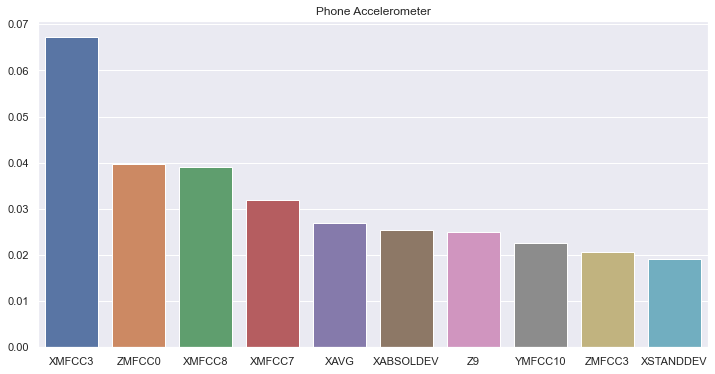

In [18]:
##Plot of top 10 important features

#sns.set(rc={"figure.figsize":(12, 6)}) 

sns.barplot(x = column_names[idx][0:10], y = importance[idx][0:10])
plt.title("Phone Accelerometer")

In [11]:
clf2 = xgb.XGBClassifier(eta = 0.4, colsample_bytree = 0.409, gamma = 1.43, max_depth = 18, min_child_weight = 4, 
                        n_estimators = 400, reg_alpha = 3.08, reg_lambda = 0.368, 
                        colsample_bylevel = 0.483, max_delta_step = 1, scale_pos_weight = 0.7, subsample = 0.89, 
                        objective = 'multi:softmax')

clf2.fit(x_train_phone_gyro, y_train_phone_gyro)

y_train_pred = clf2.predict(x_train_phone_gyro)
y_test_pred = clf2.predict(x_test_phone_gyro)

train_acc = accuracy_score(y_train_phone_gyro, y_train_pred)
test_acc = accuracy_score(y_test_phone_gyro, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_phone_gyro, y_test_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:19:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.9935619212962963
Test accuracy:  0.7789991321955453
Precision:
average = Nonen:  [0.8576779  0.77555556 0.70259865]
average = micro:  0.7789991321955453
average = macro:  0.7786107035759359
average = weighted:  0.7835089424366992
Recall:
average

Text(0.5, 1.0, 'Phone Gyroscope')

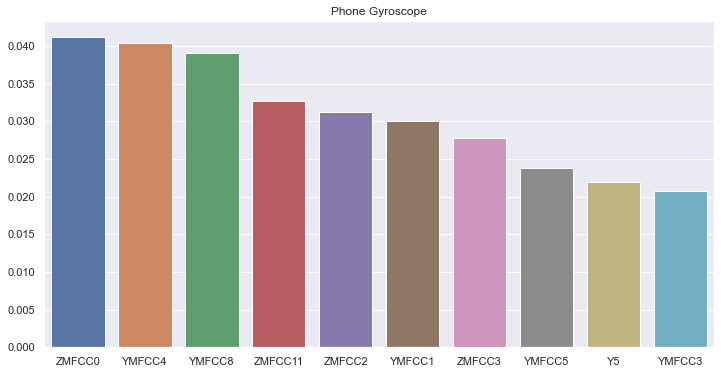

In [19]:
##Plot of top 10 important features

importance = clf2.feature_importances_

idx = np.argsort(importance)[::-1]

#importance[idx]

column_names = phone_gyro_df.columns
column_names = column_names[1:]

#sns.set(rc={"figure.figsize":(12, 6)}) 

sns.barplot(x = column_names[idx][0:10], y = importance[idx][0:10])

plt.title("Phone Gyroscope")

In [13]:
clf3 = xgb.XGBClassifier(eta = 0.4, colsample_bytree = 0.409, gamma = 1.43, max_depth = 18, min_child_weight = 4, 
                        n_estimators = 400, reg_alpha = 3.08, reg_lambda = 0.368, 
                        colsample_bylevel = 0.483, max_delta_step = 1, scale_pos_weight = 0.7, subsample = 0.89, 
                        objective = 'multi:softmax')

clf3.fit(x_train_watch_accel, y_train_watch_accel)

y_train_pred = clf3.predict(x_train_watch_accel)
y_test_pred = clf3.predict(x_test_watch_accel)

train_acc = accuracy_score(y_train_watch_accel, y_train_pred)
test_acc = accuracy_score(y_test_watch_accel, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_watch_accel, y_test_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.9950576606260296
Test accuracy:  0.9412572055997804
Precision:
average = Nonen:  [0.95084746 0.93975069 0.93228656]
average = micro:  0.9412572055997804
average = macro:  0.9409615685314702
average = weighted:  0.9413813695158876
Recall:
average

Text(0.5, 1.0, 'Watch Accelerometer')

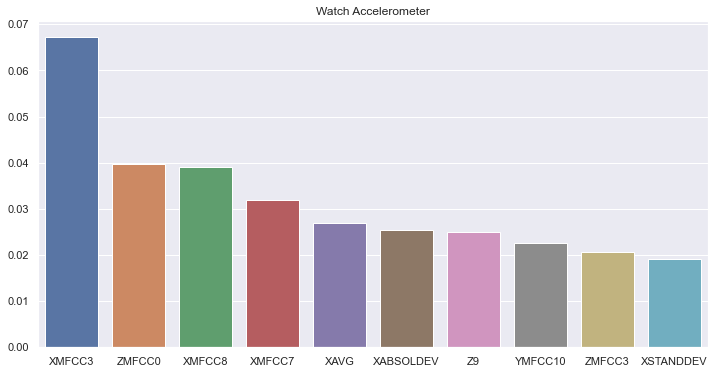

In [20]:
##Plot of top 10 important features

importance = clf3.feature_importances_

idx = np.argsort(importance)[::-1]

#importance[idx]

column_names = watch_accel_df.columns
column_names = column_names[1:]

#sns.set(rc={"figure.figsize":(12, 6)}) 

sns.barplot(x = column_names[idx][0:10], y = importance[idx][0:10])

plt.title("Watch Accelerometer")

In [15]:
clf4 = xgb.XGBClassifier(eta = 0.4, colsample_bytree = 0.409, gamma = 1.43, max_depth = 18, min_child_weight = 4, 
                        n_estimators = 400, reg_alpha = 3.08, reg_lambda = 0.368, 
                        colsample_bylevel = 0.483, max_delta_step = 1, scale_pos_weight = 0.7, subsample = 0.89, 
                        objective = 'multi:softmax')

clf4.fit(x_train_watch_gyro, y_train_watch_gyro)

y_train_pred = clf4.predict(x_train_watch_gyro)
y_test_pred = clf4.predict(x_test_watch_gyro)

train_acc = accuracy_score(y_train_watch_gyro, y_train_pred)
test_acc = accuracy_score(y_test_watch_gyro, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_watch_gyro, y_test_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.9925147436866778
Test accuracy:  0.8739038403386755
Precision:
average = Nonen:  [0.88702148 0.88586957 0.842827  ]
average = micro:  0.8739038403386755
average = macro:  0.8719060148978567
average = weighted:  0.8743669216106003
Recall:
average

Text(0.5, 1.0, 'Watch Gyroscope')

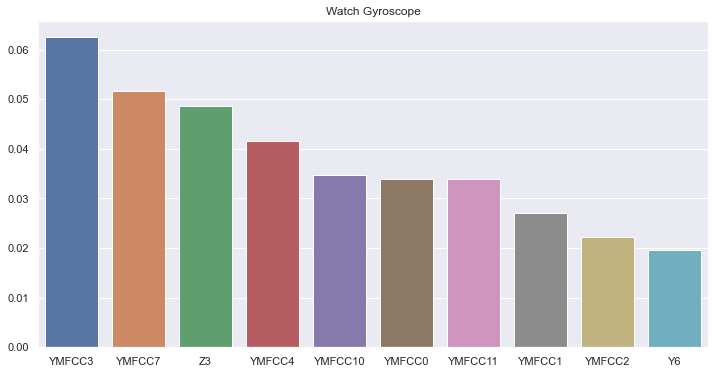

In [21]:
##Plot of top 10 important features

importance = clf4.feature_importances_

idx = np.argsort(importance)[::-1]

#importance[idx]

column_names = watch_gyro_df.columns
column_names = column_names[1:]

#sns.set(rc={"figure.figsize":(12, 6)}) 

sns.barplot(x = column_names[idx][0:10], y = importance[idx][0:10])

plt.title("Watch Gyroscope")

In [89]:
clf5 = xgb.XGBClassifier(eta = 0.4, colsample_bytree = 0.409, gamma = 1.43, max_depth = 18, min_child_weight = 4, 
                        n_estimators = 400, reg_alpha = 3.08, reg_lambda = 0.368, 
                        colsample_bylevel = 0.483, max_delta_step = 1, scale_pos_weight = 0.7, subsample = 0.89, 
                        objective = 'multi:softmax')

clf5.fit(x_train_phone_accel_pca, y_train_phone_accel)

y_train_pred = clf5.predict(x_train_phone_accel_pca)
y_test_pred = clf5.predict(x_test_phone_accel_pca)

train_acc = accuracy_score(y_train_phone_accel, y_train_pred)
test_acc = accuracy_score(y_test_phone_accel, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_phone_accel, y_test_pred)

[21:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.996912075410369
Test accuracy:  0.9126760563380282
Precision:
average = Nonen:  [0.92723632 0.90855615 0.90136327]
average = micro:  0.9126760563380282
average = macro:  0.9123852455572828
average = weighted:  0.9127557774552941
Recall:
average 

In [90]:
clf6 = xgb.XGBClassifier(eta = 0.4, colsample_bytree = 0.409, gamma = 1.43, max_depth = 18, min_child_weight = 4, 
                        n_estimators = 400, reg_alpha = 3.08, reg_lambda = 0.368, 
                        colsample_bylevel = 0.483, max_delta_step = 1, scale_pos_weight = 0.7, subsample = 0.89, 
                        objective = 'multi:softmax')

clf6.fit(x_train_phone_gyro_pca, y_train_phone_gyro)

y_train_pred = clf6.predict(x_train_phone_gyro_pca)
y_test_pred = clf6.predict(x_test_phone_gyro_pca)

train_acc = accuracy_score(y_train_phone_gyro, y_train_pred)
test_acc = accuracy_score(y_test_phone_gyro, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_phone_gyro, y_test_pred)

[21:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.9942853009259259
Test accuracy:  0.747758171825282
Precision:
average = Nonen:  [0.84080076 0.73509934 0.67111535]
average = micro:  0.747758171825282
average = macro:  0.7490051494432834
average = weighted:  0.7540441819312903
Recall:
average =

In [91]:
clf7 = xgb.XGBClassifier(eta = 0.4, colsample_bytree = 0.409, gamma = 1.43, max_depth = 18, min_child_weight = 4, 
                        n_estimators = 400, reg_alpha = 3.08, reg_lambda = 0.368, 
                        colsample_bylevel = 0.483, max_delta_step = 1, scale_pos_weight = 0.7, subsample = 0.89, 
                        objective = 'multi:softmax')

clf7.fit(x_train_watch_accel_pca, y_train_watch_accel)

y_train_pred = clf7.predict(x_train_watch_accel_pca)
y_test_pred = clf7.predict(x_test_watch_accel_pca)

train_acc = accuracy_score(y_train_watch_accel, y_train_pred)
test_acc = accuracy_score(y_test_watch_accel, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_watch_accel, y_test_pred)

[21:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.9951949478308622
Test accuracy:  0.9346692286576997
Precision:
average = Nonen:  [0.9474606  0.93038822 0.9265144 ]
average = micro:  0.9346692286576997
average = macro:  0.9347877380656641
average = weighted:  0.9348596373960454
Recall:
average

In [92]:
clf8 = xgb.XGBClassifier(eta = 0.4, colsample_bytree = 0.409, gamma = 1.43, max_depth = 18, min_child_weight = 4, 
                        n_estimators = 400, reg_alpha = 3.08, reg_lambda = 0.368, 
                        colsample_bylevel = 0.483, max_delta_step = 1, scale_pos_weight = 0.7, subsample = 0.89, 
                        objective = 'multi:softmax')

clf8.fit(x_train_watch_gyro_pca, y_train_watch_gyro)

y_train_pred = clf8.predict(x_train_watch_gyro_pca)
y_test_pred = clf8.predict(x_test_watch_gyro_pca)

train_acc = accuracy_score(y_train_watch_gyro, y_train_pred)
test_acc = accuracy_score(y_test_watch_gyro, y_test_pred)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

print_metrics(y_test_watch_gyro, y_test_pred)

[21:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.9927415696355663
Test accuracy:  0.8693680072573329
Precision:
average = Nonen:  [0.86206897 0.87771943 0.8655914 ]
average = micro:  0.8693680072573329
average = macro:  0.8684599310747227
average = weighted:  0.8692003597961104
Recall:
average